In [38]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [20]:
titanic_df = pd.read_csv("titanic.csv")


In [21]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
age_median =titanic_df['Age'].median()
titanic_df['Age'].fillna(age_median, inplace=True)


/var/folders/ps/3dwwc0f55rd3zg9_2d1j6jqw0000gn/T/ipykernel_2044/828032282.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(age_median, inplace=True)


In [24]:
embarked_mode= titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'].fillna(embarked_mode, inplace=True)


/var/folders/ps/3dwwc0f55rd3zg9_2d1j6jqw0000gn/T/ipykernel_2044/4002740127.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Embarked'].fillna(embarked_mode, inplace=True)


In [25]:
titanic_df.drop('Cabin',inplace=True, axis=1)

In [26]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
features = ['Survived','Pclass','Sex','Age', 'SibSp','Fare','Embarked','Parch']
titanic_df = titanic_df[features]
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,Parch
0,0,3,male,22.0,1,7.2500,S,0
1,1,1,female,38.0,1,71.2833,C,0
2,1,3,female,26.0,0,7.9250,S,0
3,1,1,female,35.0,1,53.1000,S,0
4,0,3,male,35.0,0,8.0500,S,0


In [28]:
le = LabelEncoder()
titanic_df['Sex'] = le.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = le.fit_transform(titanic_df['Embarked'])


In [29]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,Parch
0,0,3,1,22.0,1,7.2500,2,0
1,1,1,0,38.0,1,71.2833,0,0
2,1,3,0,26.0,0,7.9250,2,0
3,1,1,0,35.0,1,53.1000,2,0
4,0,3,1,35.0,0,8.0500,2,0


In [30]:
X = titanic_df.drop('Survived',axis=1)
y = titanic_df['Survived']

In [31]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=42)

In [32]:
dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [33]:
y_pred =dc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



In [34]:
split_ratio = [0.2, 0.3, 0.4, 0.5]
accuracies = []

for ratio in split_ratio:
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=ratio, random_state=42)
    dc = DecisionTreeClassifier()
    dc.fit(X_train,y_train)
    y_pred = dc.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    accuracies.append(acc)

    train_size = len(X_train)
    test_size_actual = len(X_test)
    print(f"Train size: {train_size}, Test size: {test_size_actual}, Accurancy: {acc:4f}")

Train size: 712, Test size: 179, Accurancy: 0.770950
Train size: 623, Test size: 268, Accurancy: 0.757463
Train size: 534, Test size: 357, Accurancy: 0.725490
Train size: 445, Test size: 446, Accurancy: 0.766816


In [40]:
dc = DecisionTreeClassifier()
cross_val_scores = cross_val_score(dc,X,y,cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-vaildation score: {cross_val_scores.mean():.4f}")
print(f"Standard deviation of cross-validation scores: {cross_val_scores.std():.4f}")

Cross-validation scores: [0.74301676 0.78651685 0.8258427  0.73033708 0.8258427 ]
Mean cross-vaildation score: 0.7823
Standard deviation of cross-validation scores: 0.0401


In [42]:
k_values = [3,5,7,10]
cv_results = {}

for k in k_values:
    dc = DecisionTreeClassifier(random_state=42)
    scores = cross_val_score(dc,X,y,cv=k, scoring ='accuracy')
    cv_results[k] = scores

    print(f"CV={k}: Scores={scores}, Mean={scores.mean():.4f}, Std={scores.std():.4f}")

CV=3: Scores=[0.72727273 0.79461279 0.75757576], Mean=0.7598, Std=0.0275
CV=5: Scores=[0.74860335 0.79213483 0.80898876 0.73595506 0.81460674], Mean=0.7801, Std=0.0320
CV=7: Scores=[0.734375   0.7578125  0.77165354 0.77952756 0.82677165 0.7480315
 0.84251969], Mean=0.7801, Std=0.0373
CV=10: Scores=[0.73333333 0.80898876 0.73033708 0.7752809  0.83146067 0.7752809
 0.79775281 0.75280899 0.82022472 0.83146067], Mean=0.7857, Std=0.0363


In [44]:
param_grid = {
    'max_depth': [5,10,15,None],
    'min_samples_split': [2,5,10],
    'min_samples_split': [1,2,4]
}

dc= DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X,y)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'min_samples_split': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [45]:
print("Best perameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


Best perameters found:  {'max_depth': 10, 'min_samples_split': 4}
Best cross-validation score:  0.8114807607808675


In [46]:
best_dc = grid_search.best_estimator_
best_dc.fit(X_train, y_train)
y_pred = best_dc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       267
           1       0.74      0.74      0.74       179

    accuracy                           0.79       446
   macro avg       0.78      0.78      0.78       446
weighted avg       0.79      0.79      0.79       446



In [47]:
best_dc

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,4
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [49]:
best_dc.predict_proba(X_test)[:,1]

array([0.16666667, 0.        , 0.        , 1.        , 0.5       ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       0.5       , 0.        , 0.        , 0.        , 0.125     ,
       1.        , 0.5       , 1.        , 0.125     , 0.        ,
       0.        , 0.875     , 0.        , 0.        , 0.125     ,
       0.        , 0.33333333, 0.125     , 0.        , 0.2       ,
       0.        , 0.        , 0.33333333, 1.        , 0.        ,
       1.        , 0.        , 1.        , 1.        , 0.        ,
       0.125     , 0.14634146, 0.        , 0.14634146, 0.        ,
       0.        , 0.4       , 0.        , 0.14634146, 0.        ,
       1.        , 1.        , 0.125     , 1.        , 0.        ,
       1.        , 0.        , 1.        , 1.        , 1.        ,
       0.14634146, 1.        , 1.        , 0.875     , 0.14634146,
       1.        , 0.125     , 0.        , 1.        , 1.        ,
       1.        , 1.        , 0.33333333, 1.        , 0.     

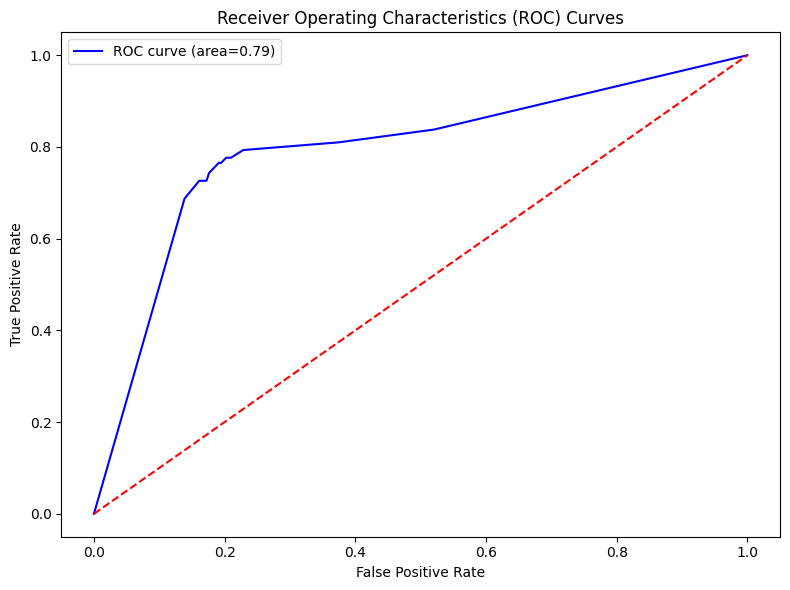

In [50]:
y_prob = best_dc.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area={roc_auc:.2f})')
plt.plot([0,1],[0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curves')
plt.legend()
plt.tight_layout()
plt.show()